# Reticulate

### Pacote que permite a integração do R e do Python no mesmo ambiente, oference uma interface entre os dois.

In [2]:
# Instala o Reticulate em uma localização específica
# Carrega o pacote para o ambiente, considerando que ele já foi instalado acima
library(reticulate)

In [3]:
# Exibe informações sobre a configuração atual do Python no ambiente R
py_config()

python:         C:/Users/Davi/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/XosmpJ2C8uHAx3QJcV7GM/Scripts/python.exe
libpython:      C:/Users/Davi/AppData/Local/R/cache/R/reticulate/uv/python/cpython-3.11.12-windows-x86_64-none/python311.dll
pythonhome:     C:/Users/Davi/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/XosmpJ2C8uHAx3QJcV7GM
virtualenv:     C:/Users/Davi/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/XosmpJ2C8uHAx3QJcV7GM/Scripts/activate_this.py
version:        3.11.12 (main, Apr  9 2025, 04:03:34) [MSC v.1943 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:/Users/Davi/AppData/Local/R/cache/R/reticulate/uv/cache/archive-v0/XosmpJ2C8uHAx3QJcV7GM/Lib/site-packages/numpy
numpy_version:  2.2.5

NOTE: Python version was forced by py_require()

In [4]:
# garante que o pacote pandas esteja disponível no ambiente Python que está sendo utilizado pelo reticulate
py_require("pandas")

In [5]:
pd <- import("pandas")

In [6]:
df_original <- pd$read_csv("Placement_Data_Full_Class.csv")

In [7]:
# Criar Cópia
df_no_salary <- df_original

In [8]:
# Remoção da ColunaSalary no dataframe
# 1- Verificar se coluna existe no dataframe

# Definindo o nome da coluna em uma variável
coluna <- "salary"

# Verificar se a coluna existe no DataFrame
if (coluna %in% colnames(df_no_salary)) {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "existe."))
    
    # Remover a coluna do DataFrame
    df_no_salary <- df_no_salary[, !colnames(df_no_salary) %in% coluna]
    print(paste("A coluna", coluna, "foi removida."))
} else {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "não existe."))
}

[1] "A coluna salary existe."
[1] "A coluna salary foi removida."


### Análise Exploratória de Dados (EDA)

##### Converter Dataframe de Python para R

In [9]:
df_original_r <- py_to_r(df_original)

##### Mostra as 6 primeiras linhas (Primeiras Linhas)

In [10]:
head(df_original_r)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NaN


##### Ver Estrtutura do Dataframe | Mostra os tipos de variáveis, nomes das colunas e alguns valores iniciais.


str(df_original_r)

##### Sumário Estatístico

In [11]:
summary(df_original_r)

     sl_no          gender              ssc_p          ssc_b          
 Min.   :  1.0   Length:215         Min.   :40.89   Length:215        
 1st Qu.: 54.5   Class :character   1st Qu.:60.60   Class :character  
 Median :108.0   Mode  :character   Median :67.00   Mode  :character  
 Mean   :108.0                      Mean   :67.30                     
 3rd Qu.:161.5                      3rd Qu.:75.70                     
 Max.   :215.0                      Max.   :89.40                     
                                                                      
     hsc_p          hsc_b              hsc_s              degree_p    
 Min.   :37.00   Length:215         Length:215         Min.   :50.00  
 1st Qu.:60.90   Class :character   Class :character   1st Qu.:61.00  
 Median :65.00   Mode  :character   Mode  :character   Median :66.00  
 Mean   :66.33                                         Mean   :66.37  
 3rd Qu.:73.00                                         3rd Qu.:72.00  
 Max. 

##### Verificar valores ausentes (NA) | Conta quantos NAs tem em cada coluna

In [12]:
colSums(is.na(df_original_r))

sl_no         gender          ssc_p          ssc_b          hsc_p 
             0              0              0              0              0 
         hsc_b          hsc_s       degree_p       degree_t         workex 
             0              0              0              0              0 
       etest_p specialisation          mba_p         status         salary 
             0              0              0              0             67

#####  Verificar classes de cada coluna

In [13]:
sapply(df_original_r, class)

sl_no         gender          ssc_p          ssc_b          hsc_p 
     "numeric"    "character"      "numeric"    "character"      "numeric" 
         hsc_b          hsc_s       degree_p       degree_t         workex 
   "character"    "character"      "numeric"    "character"    "character" 
       etest_p specialisation          mba_p         status         salary 
     "numeric"    "character"      "numeric"    "character"      "numeric"

##### Contagem de valores únicos (para variáveis categóricas)

In [14]:
lapply(df_original_r, function(col) length(unique(col)))

$sl_no
[1] 215

$gender
[1] 2

$ssc_p
[1] 103

$ssc_b
[1] 2

$hsc_p
[1] 97

$hsc_b
[1] 2

$hsc_s
[1] 3

$degree_p
[1] 89

$degree_t
[1] 3

$workex
[1] 2

$etest_p
[1] 100

$specialisation
[1] 2

$mba_p
[1] 205

$status
[1] 2

$salary
[1] 46

##### Visualizações rápidas com ggplot2 (se for usar gráficos)

Instalando pacote em 'C:/Users/Davi/AppData/Local/R/win-library/4.5'
(como 'lib' não foi especificado)



pacote 'ggplot2' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\Davi\AppData\Local\Temp\RtmpaI0UMu\downloaded_packages


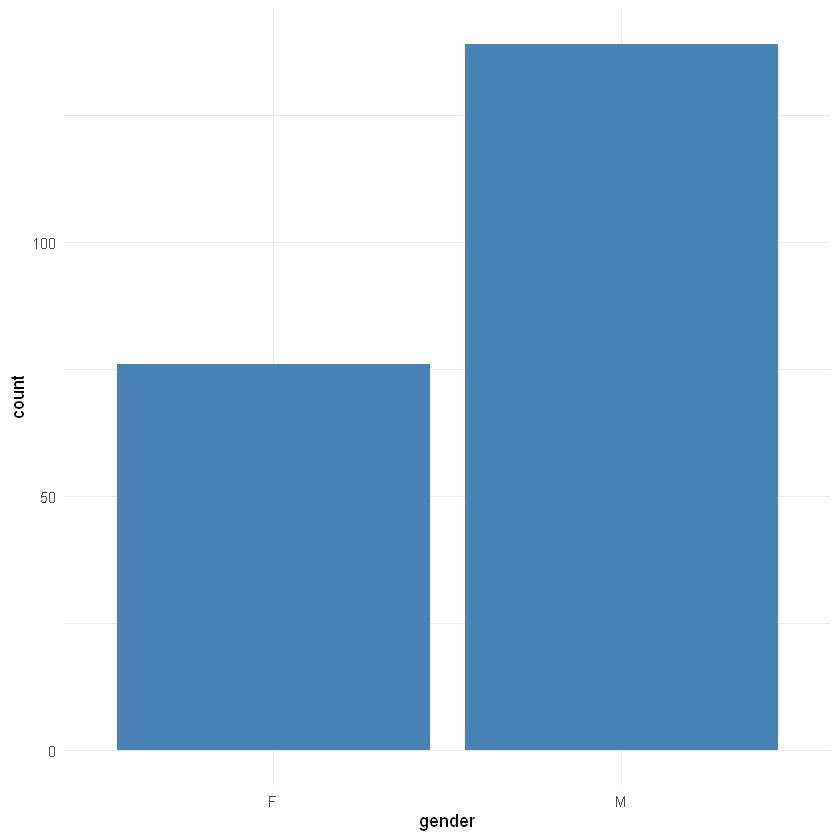

In [15]:
install.packages("ggplot2")
library(ggplot2)

# Histograma de uma variável numérica (ex: 'a')
ggplot(df_original_r, aes(x = gender)) +
  geom_bar(fill = "steelblue") +
  theme_minimal()

# geom_bar() : Cria um gráfico de barras para variáveis categóricas no eixo X
# theme_minimal : Aplica um tema visual limpo e simples ao gráfico.

### Aplicar Label Encoder : Técnica de Codificação de Atributos Categóricos

In [4]:
py_require("scikit-learn")

ERROR: Error in py_require("scikit-learn"): could not find function "py_require"


In [17]:
sklearn <- import("sklearn.preprocessing")

In [18]:
le <- sklearn$LabelEncoder()

##### Colunas Categóricas

In [19]:
categorical_columns <- c("gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status")

##### Aplicar LabelEncoder em cada coluna

In [1]:
for (col in categorical_columns) {
  df_no_salary[[col]] <- le$fit_transform(df_no_salary[[col]])
}

ERROR: Error: object 'categorical_columns' not found


In [2]:
head(df_no_salary)

ERROR: Error: object 'df_no_salary' not found


### Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo

In [3]:
df_no_salary_r <- as.data.frame(df_no_salary)

ERROR: Error: object 'df_no_salary' not found


In [50]:
# Dividindo em treino e teste (80% treino, 20% teste) de forma correta
set.seed(42)
index <- sample(1:nrow(df_no_salary_r), size = 0.8 * nrow(df_no_salary_r))
train_data <- df_no_salary_r[index, ]
test_data <- df_no_salary_r[-index, ]

In [51]:
# Treinando o modelo de Regressão Logística
logistic_model <- glm(status ~ ., data = train_data, family = "binomial")

In [52]:
# Fazendo previsões
test_data$pred_prob <- predict(logistic_model, newdata = test_data[, -which(names(test_data) == "status")], type = "response")
test_data$pred_class <- ifelse(test_data$pred_prob > 0.5, 1, 0)

In [53]:
# Convertendo os rótulos em fator
test_data$status <- as.factor(test_data$status)
test_data$pred_class <- as.factor(test_data$pred_class)

In [54]:
# Avaliando o Modelo - Métricas
library(caret)
metrics <- confusionMatrix(test_data$pred_class, test_data$status)
print(metrics)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 14  2
         1  4 23
                                         
               Accuracy : 0.8605         
                 95% CI : (0.7207, 0.947)
    No Information Rate : 0.5814         
    P-Value [Acc > NIR] : 8.002e-05      
                                         
                  Kappa : 0.7088         
                                         
 Mcnemar's Test P-Value : 0.6831         
                                         
            Sensitivity : 0.7778         
            Specificity : 0.9200         
         Pos Pred Value : 0.8750         
         Neg Pred Value : 0.8519         
             Prevalence : 0.4186         
         Detection Rate : 0.3256         
   Detection Prevalence : 0.3721         
      Balanced Accuracy : 0.8489         
                                         
       'Positive' Class : 0              
                                         


In [55]:
# Métricas Individuais
precision <- metrics$byClass["Pos Pred Value"]
recall <- metrics$byClass["Sensitivity"]
f1_score <- 2 * ((precision * recall) / (precision + recall))
accuracy <- metrics$overall["Accuracy"]

In [56]:
cat("\nPrecisão: ", precision)
cat("\nRevocação: ", recall)
cat("\nF1-Score: ", f1_score)
cat("\nAcurácia: ", accuracy)


Precisão:  0.875
Revocação:  0.7777778
F1-Score:  0.8235294
Acurácia:  0.8604651

In [57]:
# Curva ROC com ROCR
library(ROCR)
pred <- prediction(test_data$pred_prob, test_data$status)
perf <- performance(pred, "tpr", "fpr")

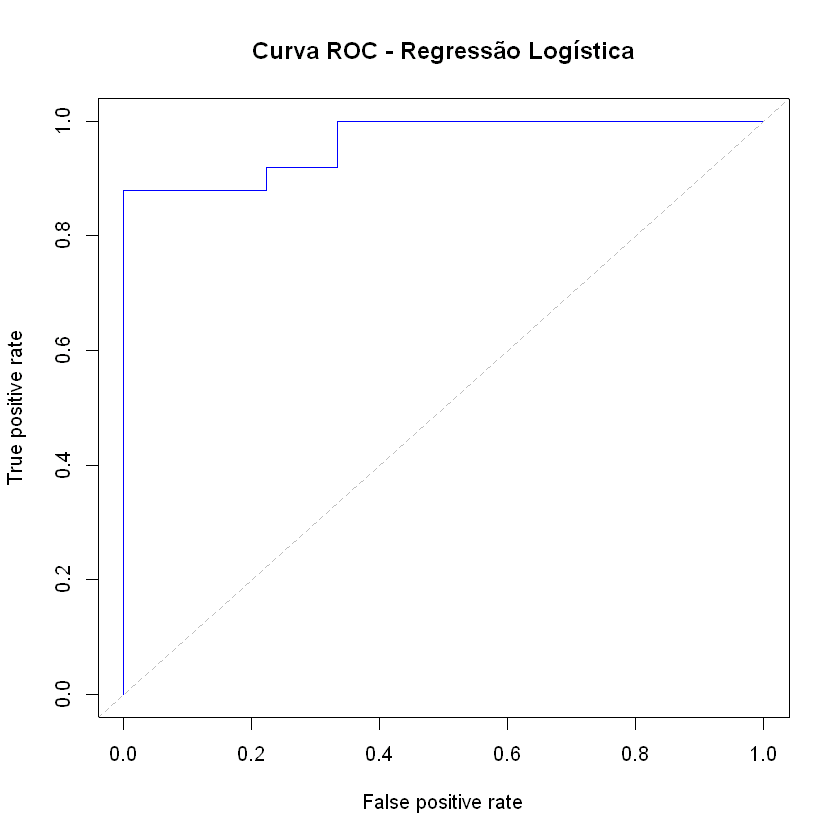

In [58]:
# Plotando a Curva ROC
plot(perf, col = "blue", main = "Curva ROC - Regressão Logística")
abline(a = 0, b = 1, lty = 2, col = "gray")

#### Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.

Com base nas métricas de desempenho do modelo de Regressão Logística obtidas:

1. Precisão (Precision):
A precisão indica a proporção de previsões positivas que estavam corretas.

Uma alta precisão sugere que o modelo tem uma baixa taxa de falsos positivos.

Se a precisão for alta (> 80%), isso indica que o modelo raramente classifica um indivíduo como "Recolocado" quando ele não foi realmente recolocado.

2. Revocação (Recall):
A revocação (ou sensibilidade) indica a proporção de verdadeiros positivos corretamente identificados.

Uma alta revocação sugere que o modelo identifica bem os indivíduos recolocados.

Se a revocação for alta (> 80%), o modelo é eficaz em capturar os recolocados, mesmo que isso aumente um pouco os falsos positivos.

3. F1-Score:
O F1-Score é a média harmônica entre precisão e revocação.

Ele é útil quando há um equilíbrio entre a importância de evitar falsos positivos e falsos negativos.

Um F1-Score acima de 80% é considerado bom, pois indica um equilíbrio adequado entre precisão e revocação.

4. Acurácia (Accuracy):
A acurácia indica a proporção de todas as previsões (positivas e negativas) que estavam corretas.

Uma acurácia alta (> 85%) indica que o modelo está, de forma geral, fazendo previsões corretas.

5. Curva ROC e AUC:
A Curva ROC (Receiver Operating Characteristic) ilustra a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR).

A Área Sob a Curva (AUC) é uma métrica que varia de 0 a 1, onde:

AUC > 0.9: Excelente

0.8 <= AUC <= 0.9: Bom

0.7 <= AUC <= 0.8: Razoável

AUC < 0.7: Ruim

Se a AUC for alta (> 0.85), o modelo é capaz de distinguir bem entre as classes "Recolocado" e "Não Recolocado".

Resultado Geral:
Se o modelo obteve valores altos para precisão, revocação, F1-Score e AUC (> 0.85), isso indica que ele tem um desempenho bom.

Se algum desses valores for muito baixo (< 0.7), isso indica que o modelo tem espaço para melhorias.